# Exploratory Data Analysis on Anime Dataset

Information gathered from [My Anime List](https://myanimelist.net/)

Usually when we think of Data Science, Machine Learning or Artificial Intelligence, we think of the models and the wonderful applications, but the first step is usually to explore the data.

The topics covered in the post is as follows:

- Introduction
- Descriptive Analysis
- Visual Analysis
- References

# Introduction

# Descriptive Analysis

In [1]:
#Library imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
import seaborn as sns
from collections import Counter
from utils import utils
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
#import missingno as msno

In [2]:
#Preparing folder variables
# os.chdir(os.path.dirname(sys.path[0])) # This command makes the notebook the main path and can work in cascade.
# main_folder = sys.path[0]
# data_folder = (main_folder + "\data")
# print(data_folder)
# df = pd.read_csv(data_folder,"anime_2022_11_20_19_51_48.csv")

In [3]:
df = pd.read_csv("C:/Users/Christiandda/Desktop/dataset/anime_2022_12_02_00_24_58.csv",sep=";")

In [4]:
df_copy = df.copy()

In [5]:
df_copy

,Cover,English_Title,Japanses_Title,Type,Source,Audience,N_Episodes,Duration,Rating,Score,Scored_by,Rank,Season,Genre,Theme,Released,Studios,Producers
0,https://cdn.myanimelist.net/images/anime/4/196...,Cowboy Bebop,カウボーイビバップ,TV,Original,[],26,24 min per ep,R - 17+ (violence & profanity),8.75,873436.0,39.0,spring,"['Action', 'Sci-Fi']","['Adult Cast', 'Space']",1998.0,['Sunrise'],['Bandai Visual']
1,https://cdn.myanimelist.net/images/anime/1439/...,Cowboy Bebop: Tengoku no Tobira,カウボーイビバップ 天国の扉,Movie,Original,[],1,1 hr 55 min,R - 17+ (violence & profanity),8.38,199329.0,185.0,NaN,"['Action', 'Sci-Fi']","['Adult Cast', 'Space']",2001.0,['Bones'],"['Sunrise', 'Bandai Visual']"
2,https://cdn.myanimelist.net/images/anime/7/203...,Trigun,トライガン,TV,Manga,['Shounen'],26,24 min per ep,PG-13 - Teens 13 or older,8.22,339491.0,323.0,spring,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",['Adult Cast'],1998.0,['Madhouse'],['Victor Entertainment']
3,https://cdn.myanimelist.net/images/anime/10/19...,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,Original,[],26,25 min per ep,PG-13 - Teens 13 or older,7.25,42135.0,2766.0,summer,"['Action', 'Drama', 'Mystery', 'Supernatural']",['Detective'],2002.0,['Sunrise'],"['TV Tokyo', 'Bandai Visual', 'Dentsu', 'Victo..."
4,https://cdn.myanimelist.net/images/anime/7/215...,Bouken Ou Beet,冒険王ビィト,TV,Manga,['Shounen'],52,23 min per ep,PG - Children,6.95,6307.0,4188.0,fall,"['Adventure', 'Fantasy', 'Supernatural']",[],2004.0,['Toei Animation'],"['TV Tokyo', 'Dentsu']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24100,https://cdn.myanimelist.net/images/anime/1720/...,We Are PAC-MAN!,We are PAC-MAN!,Music,Game,[],1,3 min,G - All Ages,NaN,NaN,NaN,NaN,[],"['Music', 'Video Game']",2022.0,[],[]
24101,https://cdn.myanimelist.net/img/sp/icon/apple-...,"Sokushi Cheat ga Saikyou sugite, Isekai no Yat...",即死チートが最強すぎて、異世界のやつらがまるで相手にならないんですが。,TV,Light novel,[],0,24 min,PG-13 - Teens 13 or older,NaN,NaN,NaN,NaN,"['Action', 'Adventure', 'Fantasy']",['Isekai'],NaN,[],[]
24102,https://cdn.myanimelist.net/images/anime/1247/...,Suzume no Tojimari x McDonald's,ビッグマックと、すすめ,Special,Original,[],0,20 min,NaN,NaN,NaN,NaN,NaN,[],[],2022.0,[],[]
24103,https://cdn.myanimelist.net/images/anime/1568/...,Hidarikiki no Eren,左ききのエレン,NaN,Manga,['Shounen'],0,Unknown,NaN,NaN,NaN,NaN,NaN,['Slice of Life'],[],NaN,[],[]


In [6]:
#To find out the number of columns and rows
df_copy.shape

(24105, 18)

In [7]:
df_copy.sample(5)

,Cover,English_Title,Japanses_Title,Type,Source,Audience,N_Episodes,Duration,Rating,Score,Scored_by,Rank,Season,Genre,Theme,Released,Studios,Producers
2062,https://cdn.myanimelist.net/images/anime/9/729...,Devilman,デビルマン,TV,Manga,[],39,25 min per ep,R - 17+ (violence & profanity),6.49,6887.0,6585.0,summer,"['Action', 'Horror', 'Supernatural']",['Mythology'],1972.0,['Toei Animation'],['Dynamic Planning']
10384,https://cdn.myanimelist.net/images/anime/3/722...,Souiu Megane,そういう眼鏡,Movie,Original,[],1,5 min,G - All Ages,4.75,216.0,12981.0,NaN,['Avant Garde'],[],2007.0,[],[]
18825,https://cdn.myanimelist.net/images/anime/1544/...,Kuaile Xiao Dongxi,快乐小东西,TV,Original,[],60,10 min per ep,G - All Ages,NaN,NaN,13512.0,NaN,['Comedy'],[],2010.0,[],[]
12071,https://cdn.myanimelist.net/images/anime/9/815...,Fujinkoron-senpai,婦人公論センパイ,ONA,Original,[],1,1 min,PG - Children,5.02,170.0,12632.0,NaN,['Comedy'],[],2016.0,['HOTZIPANG'],[]
3255,https://cdn.myanimelist.net/images/anime/1784/...,Grimm Douwa: Kin no Tori,グリム童話 金の鳥,Movie,Other,[],1,52 min,G - All Ages,6.70,614.0,5400.0,NaN,"['Adventure', 'Fantasy']",[],1987.0,"['Madhouse', 'Toei Animation']",[]


In [8]:
#Checking the count of non-null values and the format of the columns
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24105 entries, 0 to 24104
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cover           24105 non-null  object 
 1   English_Title   24105 non-null  object 
 2   Japanses_Title  23914 non-null  object 
 3   Type            24029 non-null  object 
 4   Source          24105 non-null  object 
 5   Audience        24105 non-null  object 
 6   N_Episodes      24105 non-null  int64  
 7   Duration        24105 non-null  object 
 8   Rating          23315 non-null  object 
 9   Score           14874 non-null  float64
 10  Scored_by       14874 non-null  float64
 11  Rank            21515 non-null  float64
 12  Season          5348 non-null   object 
 13  Genre           24105 non-null  object 
 14  Theme           24105 non-null  object 
 15  Released        22885 non-null  float64
 16  Studios         24105 non-null  object 
 17  Producers       24105 non-null 

In [9]:
#Print number of null per column
df_copy.isna().sum()

Cover                 0
English_Title         0
Japanses_Title      191
Type                 76
Source                0
Audience              0
N_Episodes            0
Duration              0
Rating              790
Score              9231
Scored_by          9231
Rank               2590
Season            18757
Genre                 0
Theme                 0
Released           1220
Studios               0
Producers             0
dtype: int64

In [10]:
#Print number TOTAL of null values in the df
df_copy.isna().sum().sum()

42086

In [11]:
# We check the percenteage of null values from higher to lower
((df_copy.isnull().sum() / len(df_copy))*100).sort_values(ascending = False)

Season            77.813732
Score             38.294960
Scored_by         38.294960
Rank              10.744659
Released           5.061191
Rating             3.277328
Japanses_Title     0.792367
Type               0.315287
Studios            0.000000
Theme              0.000000
Genre              0.000000
Cover              0.000000
English_Title      0.000000
Duration           0.000000
N_Episodes         0.000000
Audience           0.000000
Source             0.000000
Producers          0.000000
dtype: float64

In [12]:
# Checking missing values and the total records after dropping records and cleaning others
df_copy.describe()

,N_Episodes,Score,Scored_by,Rank,Released
count,24105.000000,14874.000000,1.487400e+04,21515.000000,22885.000000
mean,14.895623,6.428735,2.976576e+04,10740.685336,2007.175792
std,49.937253,0.906593,1.144022e+05,6206.058530,14.722202
min,0.000000,1.850000,1.010000e+02,1.000000,1917.000000
25%,1.000000,5.800000,4.070000e+02,5361.000000,2002.000000
50%,2.000000,6.430000,1.857500e+03,10743.000000,2012.000000
75%,13.000000,7.080000,1.117800e+04,16113.500000,2017.000000
max,3057.000000,9.110000,2.554804e+06,21494.000000,2024.000000


In [13]:
# Checking the type on information inside cells, for example, the cells in the columng called Studios
# for i, l in enumerate(df_copy["Rating"]):
#     print("list",i,"is",type(l))

# Data Cleaning

In [13]:
# lets convert string to list
non_numeric = ["Audience","Genre","Theme","Studios","Producers"]
for column in non_numeric:
    df_copy[column] = df_copy[column].apply(eval)
df_copy.head(5)

,Cover,English_Title,Japanses_Title,Type,Source,Audience,N_Episodes,Duration,Rating,Score,Scored_by,Rank,Season,Genre,Theme,Released,Studios,Producers
0,https://cdn.myanimelist.net/images/anime/4/196...,Cowboy Bebop,カウボーイビバップ,TV,Original,[],26,24 min per ep,R - 17+ (violence & profanity),8.75,873436.0,39.0,spring,"[Action, Sci-Fi]","[Adult Cast, Space]",1998.0,[Sunrise],[Bandai Visual]
1,https://cdn.myanimelist.net/images/anime/1439/...,Cowboy Bebop: Tengoku no Tobira,カウボーイビバップ 天国の扉,Movie,Original,[],1,1 hr 55 min,R - 17+ (violence & profanity),8.38,199329.0,185.0,NaN,"[Action, Sci-Fi]","[Adult Cast, Space]",2001.0,[Bones],"[Sunrise, Bandai Visual]"
2,https://cdn.myanimelist.net/images/anime/7/203...,Trigun,トライガン,TV,Manga,[Shounen],26,24 min per ep,PG-13 - Teens 13 or older,8.22,339491.0,323.0,spring,"[Action, Adventure, Comedy, Drama, Sci-Fi]",[Adult Cast],1998.0,[Madhouse],[Victor Entertainment]
3,https://cdn.myanimelist.net/images/anime/10/19...,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,Original,[],26,25 min per ep,PG-13 - Teens 13 or older,7.25,42135.0,2766.0,summer,"[Action, Drama, Mystery, Supernatural]",[Detective],2002.0,[Sunrise],"[TV Tokyo, Bandai Visual, Dentsu, Victor Enter..."
4,https://cdn.myanimelist.net/images/anime/7/215...,Bouken Ou Beet,冒険王ビィト,TV,Manga,[Shounen],52,23 min per ep,PG - Children,6.95,6307.0,4188.0,fall,"[Adventure, Fantasy, Supernatural]",[],2004.0,[Toei Animation],"[TV Tokyo, Dentsu]"


In [14]:
# Removing Brackets
non_numeric = ["Audience","Genre","Theme","Studios","Producers"]
for column in non_numeric:
    df_copy[column] = df_copy[column].str.join(',')
df_copy.head(5)

,Cover,English_Title,Japanses_Title,Type,Source,Audience,N_Episodes,Duration,Rating,Score,Scored_by,Rank,Season,Genre,Theme,Released,Studios,Producers
0,https://cdn.myanimelist.net/images/anime/4/196...,Cowboy Bebop,カウボーイビバップ,TV,Original,,26,24 min per ep,R - 17+ (violence & profanity),8.75,873436.0,39.0,spring,"Action,Sci-Fi","Adult Cast,Space",1998.0,Sunrise,Bandai Visual
1,https://cdn.myanimelist.net/images/anime/1439/...,Cowboy Bebop: Tengoku no Tobira,カウボーイビバップ 天国の扉,Movie,Original,,1,1 hr 55 min,R - 17+ (violence & profanity),8.38,199329.0,185.0,NaN,"Action,Sci-Fi","Adult Cast,Space",2001.0,Bones,"Sunrise,Bandai Visual"
2,https://cdn.myanimelist.net/images/anime/7/203...,Trigun,トライガン,TV,Manga,Shounen,26,24 min per ep,PG-13 - Teens 13 or older,8.22,339491.0,323.0,spring,"Action,Adventure,Comedy,Drama,Sci-Fi",Adult Cast,1998.0,Madhouse,Victor Entertainment
3,https://cdn.myanimelist.net/images/anime/10/19...,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,Original,,26,25 min per ep,PG-13 - Teens 13 or older,7.25,42135.0,2766.0,summer,"Action,Drama,Mystery,Supernatural",Detective,2002.0,Sunrise,"TV Tokyo,Bandai Visual,Dentsu,Victor Entertain..."
4,https://cdn.myanimelist.net/images/anime/7/215...,Bouken Ou Beet,冒険王ビィト,TV,Manga,Shounen,52,23 min per ep,PG - Children,6.95,6307.0,4188.0,fall,"Adventure,Fantasy,Supernatural",,2004.0,Toei Animation,"TV Tokyo,Dentsu"


In [15]:
# Replacing empty space with NaN
list_not_num = ["Audience","Genre","Theme","Studios","Producers"]
df_copy[list_not_num] = df_copy[list_not_num].apply(lambda x: x.str.strip() if isinstance(x, str) else x).replace('', np.nan)

In [16]:
# We check the percenteage of null values
((df_copy.isnull().sum() / len(df_copy))*100).sort_values(ascending = False)

Season            77.813732
Audience          60.912674
Producers         53.839452
Theme             46.081726
Studios           43.410081
Scored_by         38.294960
Score             38.294960
Genre             19.207633
Rank              10.744659
Released           5.061191
Rating             3.277328
Japanses_Title     0.792367
Type               0.315287
Duration           0.000000
English_Title      0.000000
N_Episodes         0.000000
Source             0.000000
Cover              0.000000
dtype: float64

In [17]:
#Replacing nan with ZEROS in numerical columns
list_num = ["Rank"]
for cat in list_num:
    df_copy[list_num] = df_copy[list_num].fillna(0)

In [18]:
# Lets check again the percenteage of null values
((df_copy.isnull().sum() / len(df_copy))*100).sort_values(ascending = False)

Season            77.813732
Audience          60.912674
Producers         53.839452
Theme             46.081726
Studios           43.410081
Scored_by         38.294960
Score             38.294960
Genre             19.207633
Released           5.061191
Rating             3.277328
Japanses_Title     0.792367
Type               0.315287
Duration           0.000000
English_Title      0.000000
N_Episodes         0.000000
Rank               0.000000
Source             0.000000
Cover              0.000000
dtype: float64

In [19]:
df_copy.head()

,Cover,English_Title,Japanses_Title,Type,Source,Audience,N_Episodes,Duration,Rating,Score,Scored_by,Rank,Season,Genre,Theme,Released,Studios,Producers
0,https://cdn.myanimelist.net/images/anime/4/196...,Cowboy Bebop,カウボーイビバップ,TV,Original,NaN,26,24 min per ep,R - 17+ (violence & profanity),8.75,873436.0,39.0,spring,"Action,Sci-Fi","Adult Cast,Space",1998.0,Sunrise,Bandai Visual
1,https://cdn.myanimelist.net/images/anime/1439/...,Cowboy Bebop: Tengoku no Tobira,カウボーイビバップ 天国の扉,Movie,Original,NaN,1,1 hr 55 min,R - 17+ (violence & profanity),8.38,199329.0,185.0,NaN,"Action,Sci-Fi","Adult Cast,Space",2001.0,Bones,"Sunrise,Bandai Visual"
2,https://cdn.myanimelist.net/images/anime/7/203...,Trigun,トライガン,TV,Manga,Shounen,26,24 min per ep,PG-13 - Teens 13 or older,8.22,339491.0,323.0,spring,"Action,Adventure,Comedy,Drama,Sci-Fi",Adult Cast,1998.0,Madhouse,Victor Entertainment
3,https://cdn.myanimelist.net/images/anime/10/19...,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,Original,NaN,26,25 min per ep,PG-13 - Teens 13 or older,7.25,42135.0,2766.0,summer,"Action,Drama,Mystery,Supernatural",Detective,2002.0,Sunrise,"TV Tokyo,Bandai Visual,Dentsu,Victor Entertain..."
4,https://cdn.myanimelist.net/images/anime/7/215...,Bouken Ou Beet,冒険王ビィト,TV,Manga,Shounen,52,23 min per ep,PG - Children,6.95,6307.0,4188.0,fall,"Adventure,Fantasy,Supernatural",NaN,2004.0,Toei Animation,"TV Tokyo,Dentsu"


In [20]:
# first we separate  the sentences with df_copy['Duration'].apply(lambda positions : positions.split(' '))
df_copy['Duration'] = df_copy['Duration'].apply(lambda positions : positions.split(' ')).apply(lambda positions : positions[0] if len(positions) <= 1 else # is lenght of the word 1 or is less than 1 then zero
        (int(positions[0]) / 60 if positions[1] == 'sec' else # If position 1 is sec, then we devide position 1 by 60
        (int(positions[0]) if positions[1] == 'min' else # if potision 1 is min, then pring position 0
        (int(positions[0]) * 60 if positions[1] == 'hr' and len(positions) == 2 else # If position 1 is hr and lenght of the string equals 2 (3 words), then we multiply position 1 by 60
        (int(positions[0]) * 60 + int(positions[2]) if positions[1] == 'hr' and positions[2] != 'per' and positions[2] != 'min'  else # If position 1 is hr and position 2 is not ped, then we multiply position 1 by 60 and sum to position 2
         int(positions[0]) * 60  )))))

In [21]:
df_copy.head()

,Cover,English_Title,Japanses_Title,Type,Source,Audience,N_Episodes,Duration,Rating,Score,Scored_by,Rank,Season,Genre,Theme,Released,Studios,Producers
0,https://cdn.myanimelist.net/images/anime/4/196...,Cowboy Bebop,カウボーイビバップ,TV,Original,NaN,26,24,R - 17+ (violence & profanity),8.75,873436.0,39.0,spring,"Action,Sci-Fi","Adult Cast,Space",1998.0,Sunrise,Bandai Visual
1,https://cdn.myanimelist.net/images/anime/1439/...,Cowboy Bebop: Tengoku no Tobira,カウボーイビバップ 天国の扉,Movie,Original,NaN,1,115,R - 17+ (violence & profanity),8.38,199329.0,185.0,NaN,"Action,Sci-Fi","Adult Cast,Space",2001.0,Bones,"Sunrise,Bandai Visual"
2,https://cdn.myanimelist.net/images/anime/7/203...,Trigun,トライガン,TV,Manga,Shounen,26,24,PG-13 - Teens 13 or older,8.22,339491.0,323.0,spring,"Action,Adventure,Comedy,Drama,Sci-Fi",Adult Cast,1998.0,Madhouse,Victor Entertainment
3,https://cdn.myanimelist.net/images/anime/10/19...,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,Original,NaN,26,25,PG-13 - Teens 13 or older,7.25,42135.0,2766.0,summer,"Action,Drama,Mystery,Supernatural",Detective,2002.0,Sunrise,"TV Tokyo,Bandai Visual,Dentsu,Victor Entertain..."
4,https://cdn.myanimelist.net/images/anime/7/215...,Bouken Ou Beet,冒険王ビィト,TV,Manga,Shounen,52,23,PG - Children,6.95,6307.0,4188.0,fall,"Adventure,Fantasy,Supernatural",NaN,2004.0,Toei Animation,"TV Tokyo,Dentsu"


## Cleaning Score, Scored_by and Rank values

In [22]:
df_copy['Score'] = df_copy['Score'].interpolate(method = "spline", order = 3,  limit_direction = "both", downcast = "infer")
df_copy['Scored_by'] = df_copy['Scored_by'].interpolate(method = "spline", order = 3,  limit_direction = "both", downcast = "infer")

In [23]:
column = df_copy['Rank']
count = column[column == 0].count()
count

2590

In [24]:
with_zeros = df_copy[['Score','Scored_by','Rank']].copy()

# setup x and y for training
# drop data with zero in the row
clean_df = with_zeros[with_zeros.Rank  != 0]

# separate variables into my x and y
x = clean_df[['Score','Scored_by']].values
y = clean_df['Rank'].values

# fit my model
lm = LinearRegression()
lm.fit(x, y)

# get the rows I am trying to do my prediction on
predict_x = with_zeros[with_zeros['Rank'] == 0][['Score','Scored_by']].values

# perform my prediction
lm.predict(predict_x)

# Get index of missing data
missing_index = with_zeros[with_zeros['Rank'] == 0].index

# Replace
df_copy.loc[missing_index, 'Rank'] = lm.predict(predict_x)

In [25]:
column = df_copy['Rank']
count = column[column == 0].count()
count

0

In [26]:
df_copy.head()

,Cover,English_Title,Japanses_Title,Type,Source,Audience,N_Episodes,Duration,Rating,Score,Scored_by,Rank,Season,Genre,Theme,Released,Studios,Producers
0,https://cdn.myanimelist.net/images/anime/4/196...,Cowboy Bebop,カウボーイビバップ,TV,Original,NaN,26,24,R - 17+ (violence & profanity),8.75,873436.0,39.0,spring,"Action,Sci-Fi","Adult Cast,Space",1998.0,Sunrise,Bandai Visual
1,https://cdn.myanimelist.net/images/anime/1439/...,Cowboy Bebop: Tengoku no Tobira,カウボーイビバップ 天国の扉,Movie,Original,NaN,1,115,R - 17+ (violence & profanity),8.38,199329.0,185.0,NaN,"Action,Sci-Fi","Adult Cast,Space",2001.0,Bones,"Sunrise,Bandai Visual"
2,https://cdn.myanimelist.net/images/anime/7/203...,Trigun,トライガン,TV,Manga,Shounen,26,24,PG-13 - Teens 13 or older,8.22,339491.0,323.0,spring,"Action,Adventure,Comedy,Drama,Sci-Fi",Adult Cast,1998.0,Madhouse,Victor Entertainment
3,https://cdn.myanimelist.net/images/anime/10/19...,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,Original,NaN,26,25,PG-13 - Teens 13 or older,7.25,42135.0,2766.0,summer,"Action,Drama,Mystery,Supernatural",Detective,2002.0,Sunrise,"TV Tokyo,Bandai Visual,Dentsu,Victor Entertain..."
4,https://cdn.myanimelist.net/images/anime/7/215...,Bouken Ou Beet,冒険王ビィト,TV,Manga,Shounen,52,23,PG - Children,6.95,6307.0,4188.0,fall,"Adventure,Fantasy,Supernatural",NaN,2004.0,Toei Animation,"TV Tokyo,Dentsu"


## Dorpping unncesseray columns

In [28]:
# In the case of Audience, it is basically the japanese way to classify the people that would watch the anime. 
# From My Anime List a different way of classification (more international style) was created to be more understandable for non japanese.
# Fro this reason we are not going to use Audience and we are going to drop it.

In [27]:
audience = df_copy['Audience'].str.split(',').explode().value_counts()
audience

Kids       5785
Shounen    2035
Seinen      915
Shoujo      700
Josei       105
Name: Audience, dtype: int64

In [28]:
# In the case of Audience, it is basically the same as rating.
rating = df_copy['Rating'].str.split(',').explode().value_counts()
rating

PG-13 - Teens 13 or older         8192
G - All Ages                      7230
PG - Children                     3989
Rx - Hentai                       1455
R - 17+ (violence & profanity)    1376
R+ - Mild Nudity                  1073
Name: Rating, dtype: int64

In [29]:
# Dorpping unncesseray columns
df_copy.drop(["Cover" ,"English_Title" ,"Japanses_Title","Season","Audience" ] , axis = 1 , inplace = True)

In [30]:
# Lets check again the percenteage of null values
((df_copy.isnull().sum() / len(df_copy))*100).sort_values(ascending = False)

Producers     53.839452
Theme         46.081726
Studios       43.410081
Genre         19.207633
Released       5.061191
Rating         3.277328
Type           0.315287
Source         0.000000
N_Episodes     0.000000
Duration       0.000000
Score          0.000000
Scored_by      0.000000
Rank           0.000000
dtype: float64

In [31]:
df_copy.sample(5)

,Type,Source,N_Episodes,Duration,Rating,Score,Scored_by,Rank,Genre,Theme,Released,Studios,Producers
5024,Movie,Original,1,11,G - All Ages,6.455189,388.500050,13834.0,NaN,Historical,1937.0,NaN,NaN
13368,Music,Music,1,4,G - All Ages,5.360000,127.000000,11849.0,NaN,Music,2013.0,NaN,Warner Music Japan
13994,Music,Music,1,3,PG-13 - Teens 13 or older,6.393334,5567.354012,19277.0,NaN,Music,2015.0,NaN,Felicity
6092,Special,Original,1,18,PG-13 - Teens 13 or older,6.190000,911.000000,8266.0,Action,"Historical,Super Power",2010.0,A-1 Pictures,Aniplex
21273,ONA,Manga,20,14,PG-13 - Teens 13 or older,6.580000,199.000000,6057.0,"Action,Adventure,Fantasy","Historical,Martial Arts",2021.0,BYMENT,Tencent Penguin Pictures


In [32]:
# Lets assign Unkowns to all the Nan in the CATEGORICAL VARIABLES columns
df_copy['Type'] = df_copy['Type'].fillna('Unknown')
df_copy['Rating'] = df_copy['Rating'].fillna('Unknown')
df_copy['Genre'] = df_copy['Genre'].fillna('Unknown')
df_copy['Theme'] = df_copy['Theme'].fillna('Unknown')
df_copy['Studios'] = df_copy['Studios'].fillna('Unknown')
df_copy['Producers'] = df_copy['Producers'].fillna('Unknown')

In [33]:
df_copy.sample(5)

,Type,Source,N_Episodes,Duration,Rating,Score,Scored_by,Rank,Genre,Theme,Released,Studios,Producers
7959,TV,Manga,20,24,PG-13 - Teens 13 or older,7.580000,621559.000000,1410.000000,"Comedy,Romance","Harem,School",2014.0,Shaft,"Aniplex,Mainichi Broadcasting System,Shueisha"
14983,OVA,Manga,1,25,Rx - Hentai,7.230000,5857.000000,7115.337503,Hentai,Unknown,2019.0,Seven,Pink Pineapple
2673,Special,Manga,1,17,PG-13 - Teens 13 or older,7.070000,7384.000000,3645.000000,Unknown,Mahou Shoujo,1993.0,Toei Animation,Unknown
1712,TV,Unknown,13,25,PG - Children,6.620000,2503.000000,5836.000000,Fantasy,"Mahou Shoujo,School",2006.0,AIC Spirits,"VAP,AIC,BeSTACK"
22853,TV,Mixed media,0,Unknown,Unknown,6.332244,210.800024,11184.581236,Unknown,Music,2023.0,Pine Jam,Avex Pictures


In [34]:
# Lets check again the percenteage of null values
((df_copy.isnull().sum() / len(df_copy))*100).sort_values(ascending = False)

Released      5.061191
Type          0.000000
Source        0.000000
N_Episodes    0.000000
Duration      0.000000
Rating        0.000000
Score         0.000000
Scored_by     0.000000
Rank          0.000000
Genre         0.000000
Theme         0.000000
Studios       0.000000
Producers     0.000000
dtype: float64

In [37]:
column = df_copy['Released']
count = column[column == 0].count()
count

0

In [38]:
df_copy['Released'] = df_copy['Released'].interpolate(method = "spline", order = 1,  limit_direction = "both", downcast = "infer")

In [39]:
df_copy[['Scored_by','Rank','Released']] = df_copy[['Scored_by','Rank','Released']].astype('int')

In [40]:
column = df_copy['Released']
count = column[column == 0].count()
count

0

In [41]:
# In the case of Audience, it is basically the same as rating.
rating = df_copy['Released'].value_counts()
rating

2017    1249
2016    1223
2018    1214
2021    1171
2019    1166
        ... 
2024       2
1937       2
1945       1
1944       1
1921       1
Name: Released, Length: 104, dtype: int64

In [42]:
df_copy.sample(5)

,Type,Source,N_Episodes,Duration,Rating,Score,Scored_by,Rank,Genre,Theme,Released,Studios,Producers
1558,Special,Unknown,2,23,G - All Ages,6.560000,3437,6172,"Drama,Romance,Slice of Life",Unknown,2006,J.C.Staff,Broccoli
6085,OVA,Manga,1,25,PG-13 - Teens 13 or older,7.210000,11441,2967,"Action,Adventure",Super Power,1998,Pierrot,Unknown
6129,Special,Visual novel,1,3,Rx - Hentai,6.900000,2619,8610,"Sci-Fi,Hentai",Unknown,2010,Anime Antenna Iinkai,Pixy
6064,Special,Original,1,8,G - All Ages,6.870000,5620,4544,"Drama,Sci-Fi,Slice of Life",Unknown,2010,Unknown,ElectromagneticWave
17801,TV,Manga,52,22,G - All Ages,6.367082,27163,14910,Comedy,Unknown,2000,Shanghai Animation Film Studio,Unknown


In [44]:
corr = df_copy.corr ()
corr.style.background_gradient (cmap = 'coolwarm')

,N_Episodes,Score,Scored_by,Rank,Released
N_Episodes,1.000000,0.054057,0.042452,0.048143,-0.019330
Score,0.054057,1.000000,0.314748,-0.543932,0.174863
Scored_by,0.042452,0.314748,1.000000,-0.166682,0.058425
Rank,0.048143,-0.543932,-0.166682,1.000000,-0.081006
Released,-0.019330,0.174863,0.058425,-0.081006,1.000000


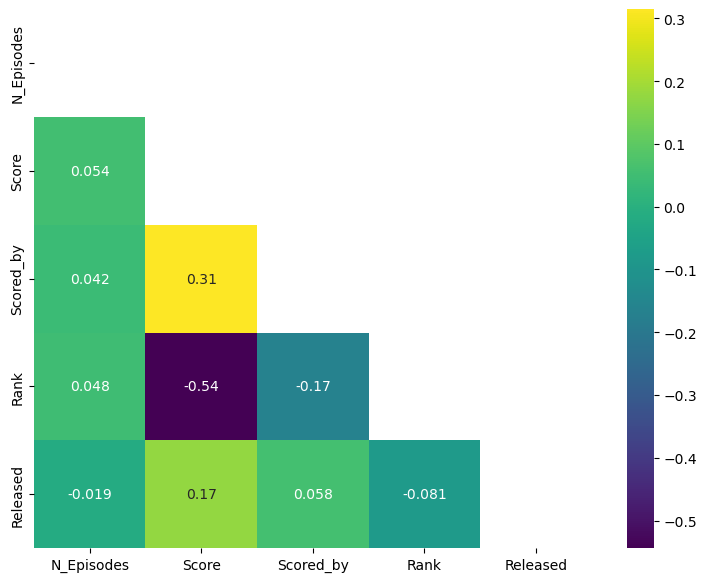

In [43]:
#Definimos la matriz de correlación como la fuente de nuestros datos
corr = df_copy.corr()

#Definimos el tamaño de la figura para asegurar que se observen los valores interiores
ax = plt.subplots(figsize=(9,7))

#Generamos una máscara para evitar tener un espejo en la parte superior de la gráfica y simplificar la observación
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

#Usando seaborn heatmap como tipo de gráfica, colocamos los valores, solicitamos que incluya las anotaciones y seleccionamos un mapa de color, en este caso utilizamos "viridis" y seleccionamos la máscara para no mostrar los datos duplicados, iniciando por la diagonal de unos en la parte central de la gráfica
ax = sns.heatmap(corr,annot=True,cmap='viridis',mask = mask)

# Visual Analysis

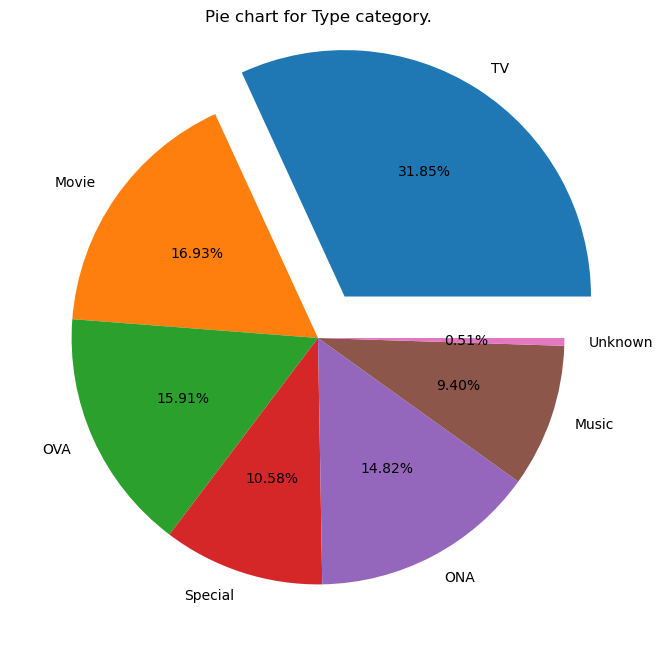

In [ ]:
# Pieplot of a column. in the def we write the column data and the name we wan to give to the chart
utils.pieplot(df_copy["Type"],"Type")

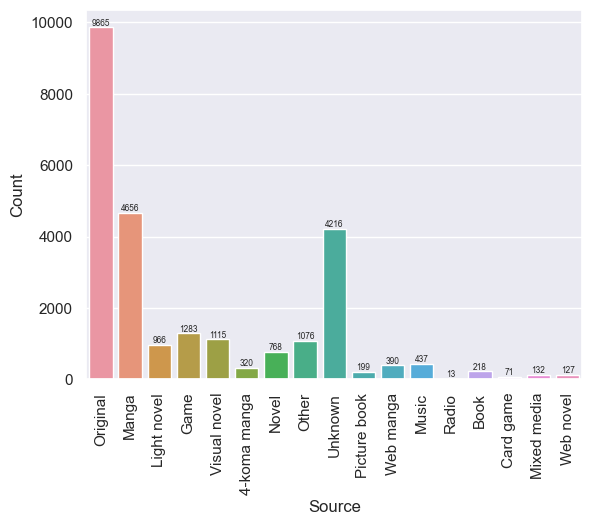

In [153]:
utils.simple_barplot(df_copy["Source"],"Source")

In [ ]:
def box(df,cat):
    plt.figure(figsize=(6,6))
    sns.boxplot(data = df , y = cat)


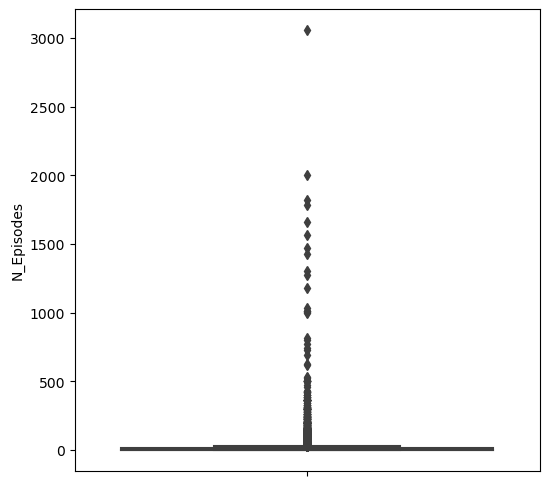

In [ ]:
utils.box(df_copy,'N_Episodes') # Hacer una escala logaricmica  numpy loc de n_pisodios+1 

In [ ]:
# Fro duration: convert to number, then  sns.displot and sns.boxplot

In [ ]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

sns.histplot(data=df_copy, x="Released", bins=50)
plt.show()

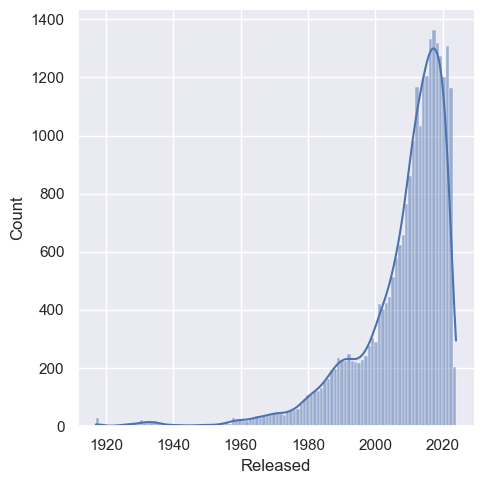

In [323]:
# For Score a sns.displot and sns.boxplo
sns.displot(data = df_copy , x = 'Released' , kde = True) #anderson darling

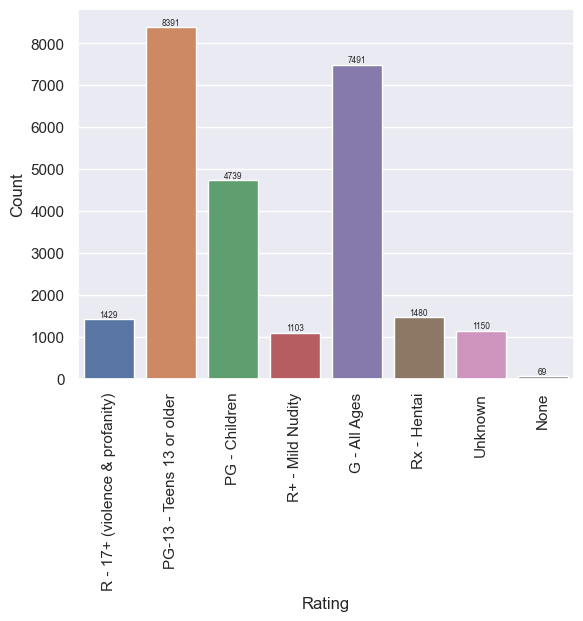

In [155]:
# For Score a sns.displot and sns.boxplot
utils.simple_barplot(df_copy["Rating"],"Rating")

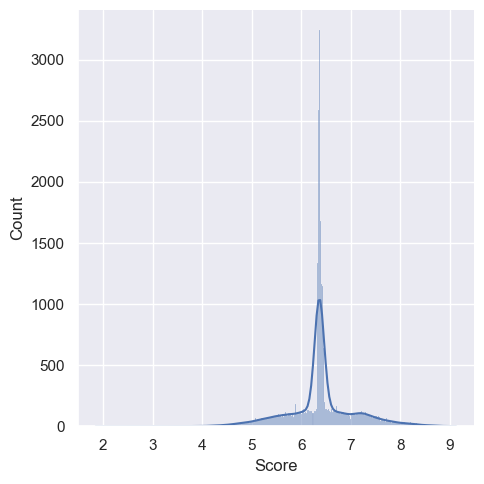

In [324]:
# For Score a sns.displot and sns.boxplo
sns.displot(data = df_copy , x = 'Score' , kde = True) #anderson darling

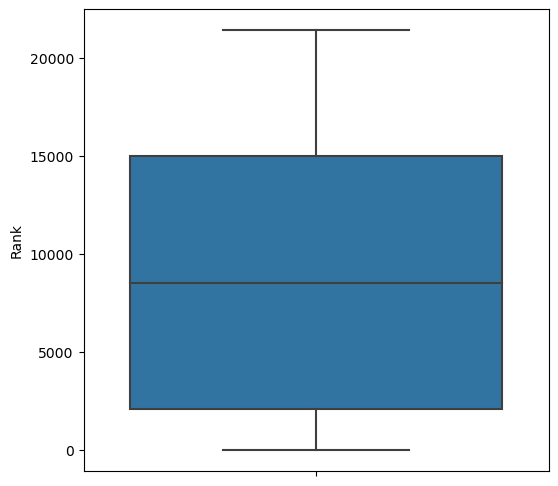

In [19]:
utils.box(df_copy,'Rank')

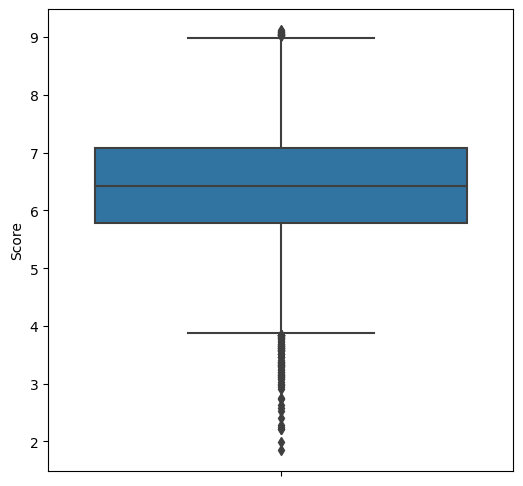

In [24]:
utils.box(df_copy,'Score')

In [36]:
df_copy["Score"].describe()

count    14867.000000
mean         6.421725
std          0.911462
min          1.850000
25%          5.790000
50%          6.430000
75%          7.080000
max          9.120000
Name: Score, dtype: float64

In [37]:
df_copy["Score"].info()

<class 'pandas.core.series.Series'>
Int64Index: 14867 entries, 0 to 25811
Series name: Score
Non-Null Count  Dtype  
--------------  -----  
14867 non-null  float64
dtypes: float64(1)
memory usage: 748.3 KB


In [38]:
# Get count of values greater than 20 in the column 'C' 
count = df_copy["Score"][df_copy["Score"] > 5].count()
count

14018

In [39]:
df_copy.sample(5)

,Type,Source,N_Episodes,Duration,Status,Rating,Score,Scored_by,Rank,Genre,Theme,Released,Studios,Producers
3435,OVA,Original,1,23 min,Finished Airing,Rx - Hentai,5.16,601,0,Hentai,Unknown,2007,Blue Cat,Animac
15812,Music,Music,1,4 min,Finished Airing,PG-13 - Teens 13 or older,6.34,1246,7391,Unknown,Music,2016,Unknown,Sony Music Entertainment
1402,OVA,Game,3,28 min per ep,Finished Airing,PG-13 - Teens 13 or older,6.60,1665,5917,Sci-Fi,"Mecha,Space",2005,Brain's Base,Bandai Visual
596,TV,Manga,13,24 min per ep,Finished Airing,R - 17+ (violence & profanity),7.05,29090,3778,"Drama,Romance",Psychological,2004,A.C.G.T.,"Geneon Universal Entertainment,TV Asahi,Rondo ..."
23345,ONA,Original,1,5 min,Finished Airing,G - All Ages,6.15,291,8416,Unknown,Workplace,2022,Sunrise,Unknown


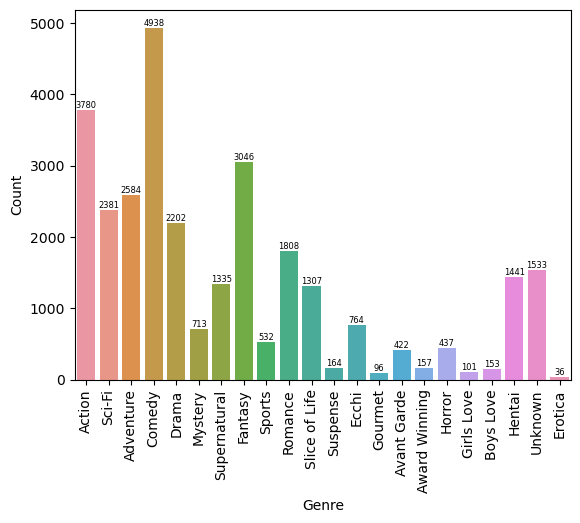

In [40]:
# Genres: Top 10. sns.barplot
utils.complex_barplot(df_copy["Genre"],"Genre")

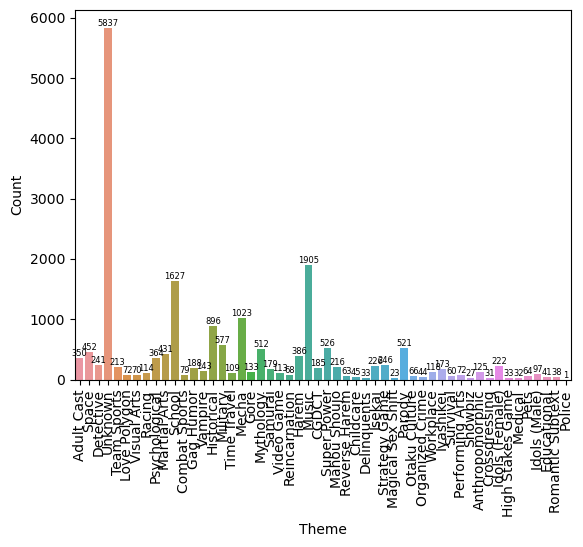

In [41]:
utils.complex_barplot(df_copy["Theme"],"Theme")

In [42]:
# Fro duration: convert to number, then  sns.displot and sns.boxplot

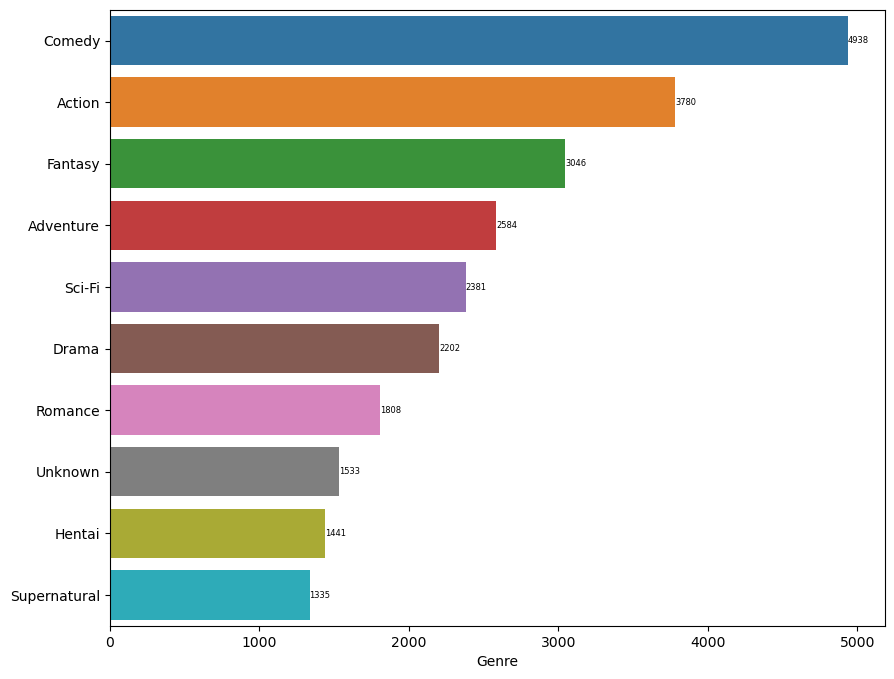

In [43]:
# Genres: Top 10. sns.barplot
utils.complex_barplot_top10(df_copy["Genre"])

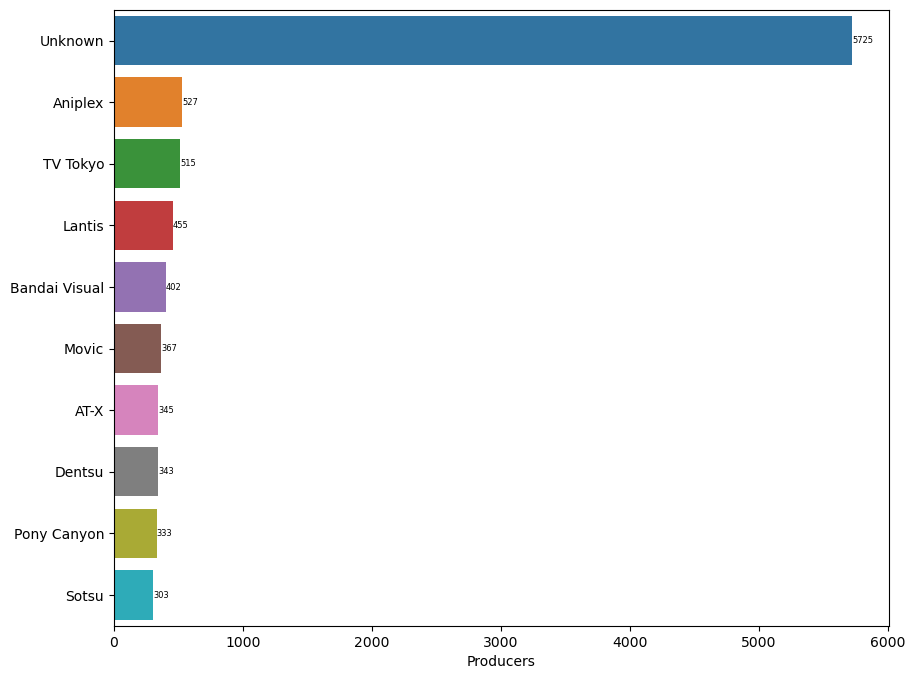

In [44]:
# Producers: Top 10. sns.barplot
utils.complex_barplot_top10(df_copy["Producers"])

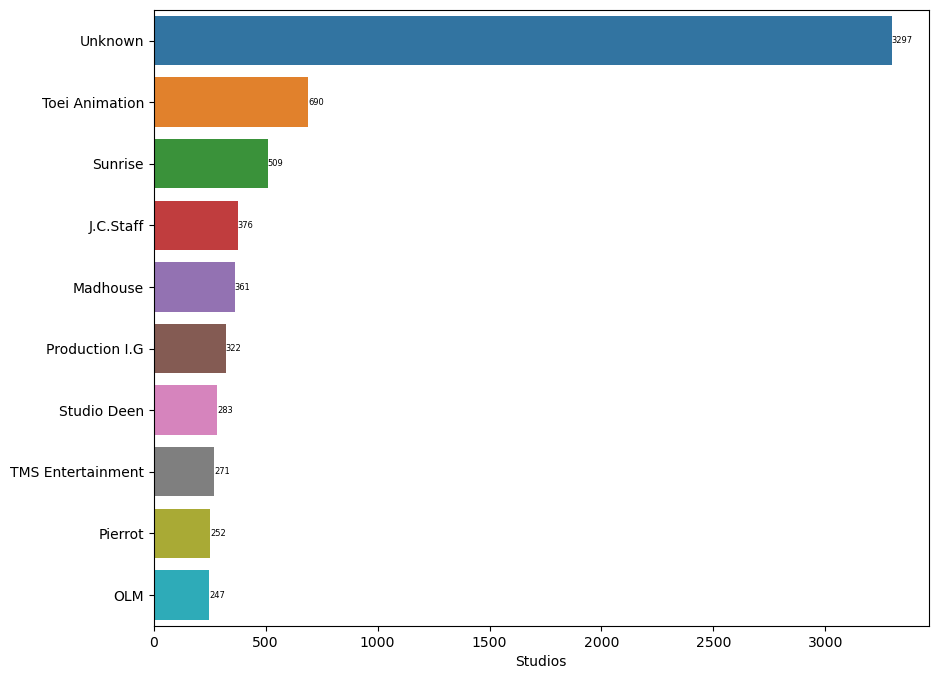

In [45]:
# Studios: Top 10. sns.barplot
utils.complex_barplot_top10(df_copy["Studios"])

In [46]:
# Rating: .value_counts() and sns.countplot o treemap
df_copy['Rating'].value_counts()

PG-13 - Teens 13 or older         6598
G - All Ages                      3574
Rx - Hentai                       1431
R - 17+ (violence & profanity)    1225
PG - Children                      975
R+ - Mild Nudity                   970
Unknown                             94
Name: Rating, dtype: int64

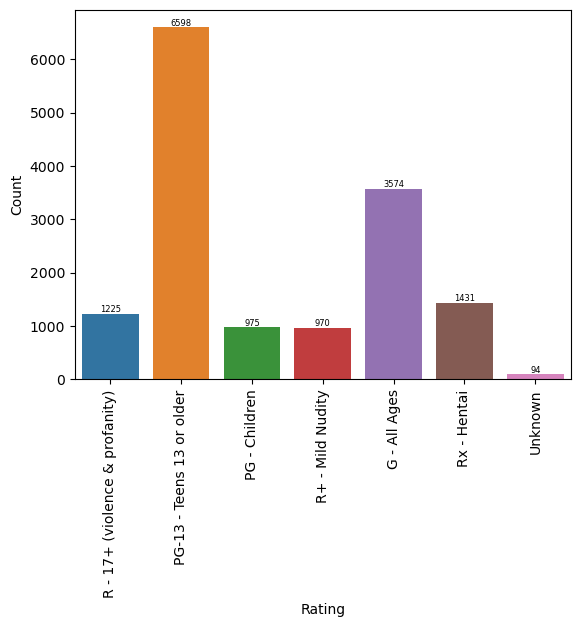

In [47]:
utils.simple_barplot(df_copy["Rating"],"Rating")

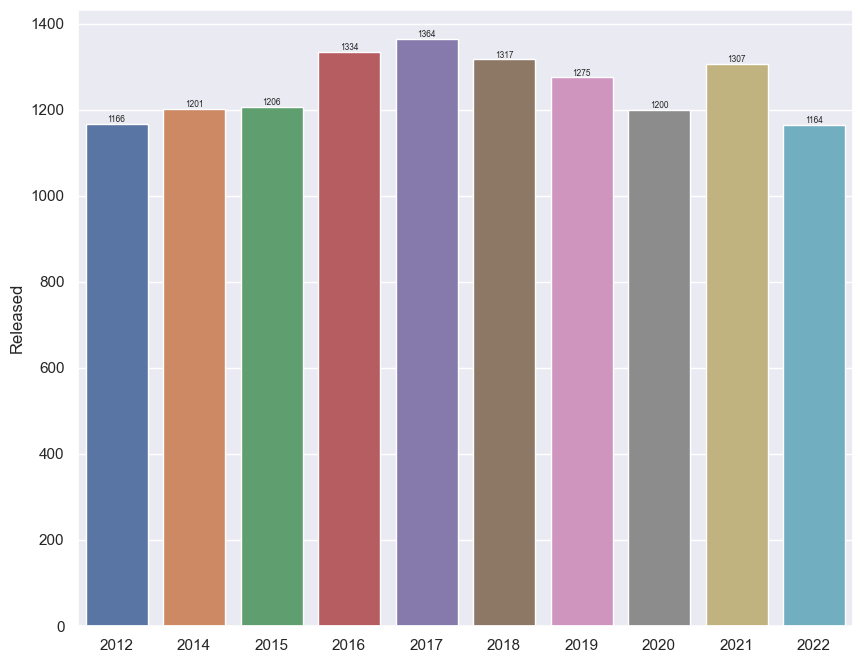

In [325]:
# Released:  Top 10.  sns.barplot. Tree map with types?
utils.barplot_top10(df_copy["Released"])

In [49]:
import d3treeR

d3tree2( p ,  rootname = "General" )

ModuleNotFoundError: No module named 'd3treeR'

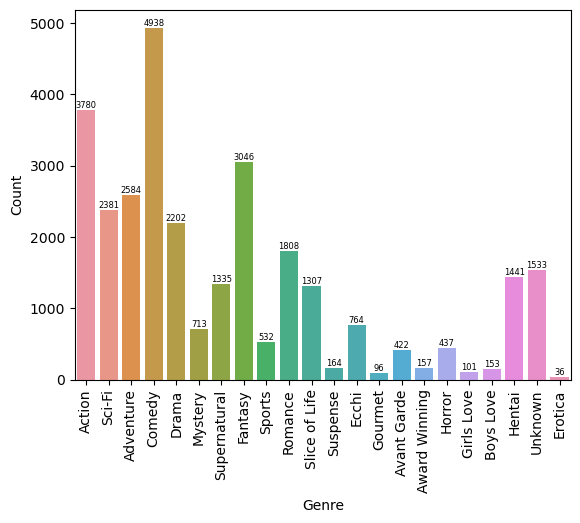

In [ ]:
utils.complex_barplot(df_copy["Genre"],"Genre")

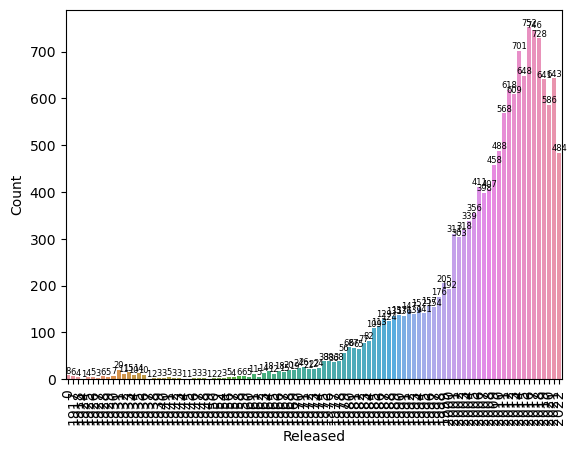

In [ ]:
# Season:  sns.barplot
utils.simple_barplot(df_copy["Released"],"Released")  ## -----> change it to histogram???  or barplot since 2000??

# Tries

In [416]:
# Computes feature correlation
df_corr = df_copy.corr(method="pearson")
df_corr

,N_Episodes,Score,Scored_by,Rank,Released,Finished
N_Episodes,1.000000,-0.081739,0.020651,0.058097,-0.111920,0.226556
Score,-0.081739,1.000000,0.236962,-0.551571,0.340307,0.128264
Scored_by,0.020651,0.236962,1.000000,-0.193864,0.060391,0.203213
Rank,0.058097,-0.551571,-0.193864,1.000000,0.137142,-0.042624
Released,-0.111920,0.340307,0.060391,0.137142,1.000000,0.046490
Finished,0.226556,0.128264,0.203213,-0.042624,0.046490,1.000000


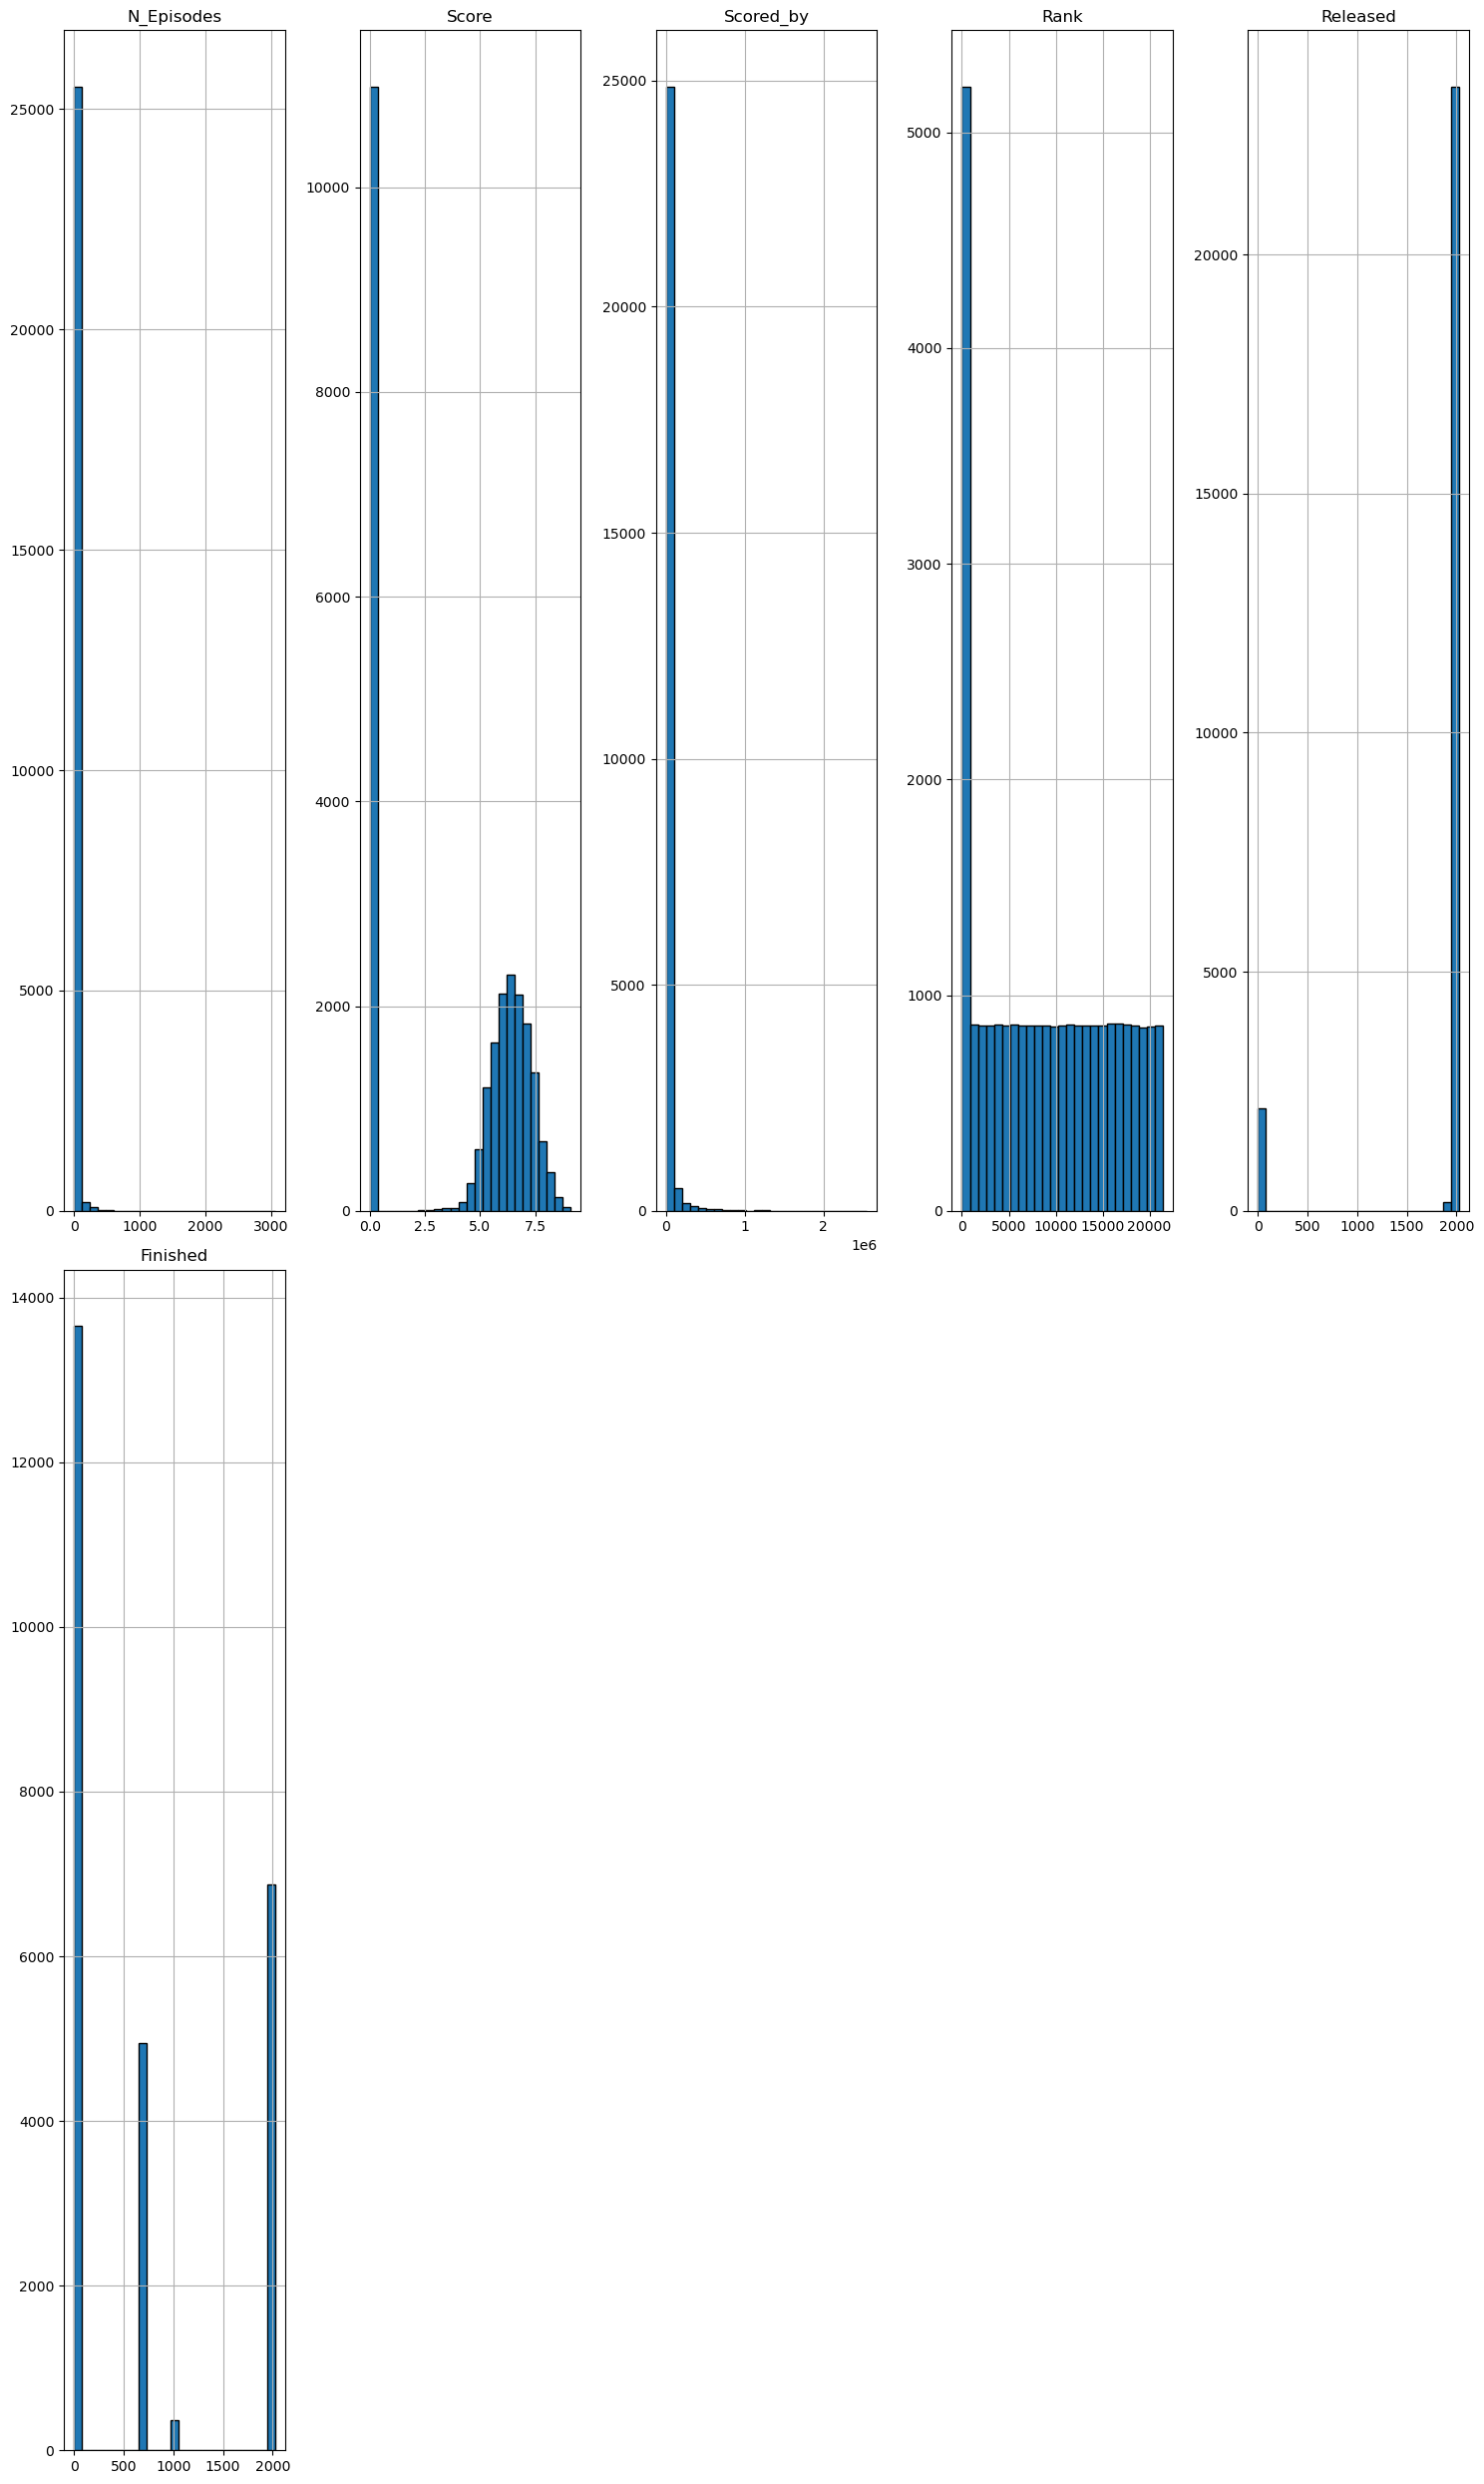

In [404]:
# Plots the histogram for each numerical feature in a separate subplot
df_copy.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

Ideas: 
Unidimensional
- For Score a sns.displot and sns.boxplot----------------------------------------DONE
- For Episodes a describe and sns.boxplot----------------------------------------DONE
- Fro duration: convert to number, then  sns.displot and sns.boxplot
- Genres: Top 10. sns.barplot----------------------------------------------------DONE
- Producers: Top 10. sns.barplot-------------------------------------------------DONE
- Licensors: Top 10. sns.barplot-------------------------------------------------DONE
- Studios: Top 10. sns.barplot---------------------------------------------------DONE
- Rating: .value_counts() and sns.countplot o treemap
- Released:  Top 10.  sns.barplot. Tree map with types?
- Season:  sns.barplot-----------------------------------------------------------DONE

Bidimensional
- Score v Episodes corr. scatterplot?
- Score v Duration corr. scatterplot?
- Genres (all) v Score boxplot?
- Genre (top10) boxplot top 10
- BOXPLOT OF TOP10 PRODUCERS v Score
- Producers v Score
- Type v Score boxplot
- BOXPLOT OF TOP10 Studio v Score
- Studio vs Score

In [414]:
# Collects for each feature the most frequent entry
most_frequent_entry = df_copy.mode()
most_frequent_entry


,Cover,English_Title,Japanses_Title,Type,Source,Audience,N_Episodes,Duration,Status,Rating,Score,Scored_by,Rank,Season,Genre,Theme,Released,Finished,Studios,Producers
0,https://cdn.myanimelist.net/img/sp/icon/apple-...,Castlevania,おしりたんてい,TV,Original,Kids,1.0,24 min per ep,Finished Airing,PG-13 - Teens 13 or older,0.0,0.0,0.0,spring,Comedy,Music,0.0,0.0,Toei Animation,NHK
1,NaN,NaN,僕のヒーローアカデミア,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [415]:

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_copy.mean().sort_values(ascending=False)
df_freq


C:\Users\Christiandda\AppData\Local\Temp\ipykernel_17284\2198003371.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_freq = df_copy.mean().sort_values(ascending=False)


Scored_by     17086.534349
Rank           8905.003327
Released       1840.505029
Finished        676.467585
N_Episodes       15.678632
Score             3.693014
dtype: float64

In [ ]:
# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4));

In [44]:
Genre = df_copy['Genre'].str.split(',').explode().value_counts()
Genre

Comedy           4938
Action           3780
Fantasy          3046
Adventure        2584
Sci-Fi           2381
Drama            2202
Romance          1808
Unknown          1533
Hentai           1441
Supernatural     1335
Slice of Life    1307
Ecchi             764
Mystery           713
Sports            532
Horror            437
Avant Garde       422
Suspense          164
Award Winning     157
Boys Love         153
Girls Love        101
Gourmet            96
Erotica            36
Name: Genre, dtype: int64

In [59]:
# Checking the lenght of a column 

piedata = Counter(df_copy["Status"])
bars  = list(piedata.values())
length =len(bars)

print(length)

2


In [145]:
df_copy["Genre"].value_counts()

Unknown                                       1533
Comedy                                        1161
Hentai                                        1146
Fantasy                                        410
Action,Sci-Fi                                  376
                                              ... 
Avant Garde,Fantasy,Romance                      1
Action,Comedy,Romance,Supernatural,Hentai        1
Drama,Fantasy,Mystery,Romance,Supernatural       1
Adventure,Comedy,Romance,Sports                  1
Comedy,Romance,Sci-Fi,Supernatural               1
Name: Genre, Length: 953, dtype: int64

In [146]:
df_copy["Genre"].unique()

array(['Action,Sci-Fi', 'Action,Adventure,Comedy,Drama,Sci-Fi',
       'Action,Drama,Mystery,Supernatural',
       'Adventure,Fantasy,Supernatural', 'Sports',
       'Comedy,Drama,Romance,Slice of Life',
       'Comedy,Slice of Life,Sports', 'Action,Drama',
       'Drama,Mystery,Suspense', 'Action,Adventure,Fantasy',
       'Action,Sports', 'Comedy,Romance',
       'Action,Adventure,Comedy,Sci-Fi,Ecchi', 'Action,Drama,Sci-Fi',
       'Action,Supernatural', 'Comedy,Gourmet',
       'Action,Avant Garde,Award Winning,Drama,Sci-Fi,Suspense',
       'Drama,Sci-Fi', 'Avant Garde,Drama,Sci-Fi',
       'Action,Adventure,Drama,Fantasy,Horror,Supernatural',
       'Action,Mystery,Sci-Fi,Suspense', 'Action,Drama,Romance',
       'Action,Adventure,Comedy,Romance', 'Drama',
       'Action,Adventure,Horror,Sci-Fi,Supernatural',
       'Adventure,Fantasy,Mystery,Sci-Fi', 'Comedy,Romance,Supernatural',
       'Action,Drama,Romance,Supernatural', 'Comedy,Drama,Sci-Fi,Sports',
       'Comedy,Drama,Roman

In [98]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

def simple_barplot(data, graph_name):
    # Process the genre column to split on comma and append resulting
    # genres all to a single list
    # all_genres = []
    # for item in anime_df["Genre"]:
    #     item = item.strip()
    #     all_genres.extend(item.split(','))


    # creating a dict from the data
    bar_date_dict = Counter(data)

    barplot_df=pd.DataFrame.from_dict(bar_date_dict,orient='index').reset_index() # creating a df from

    barplot_df=barplot_df.rename(columns={'index':graph_name, 0:'Count'}) # renaming the columns of the df

    bar_plot = sns.barplot(x=barplot_df[graph_name],y=barplot_df["Count"]) #assigning values to the plot

    bar_plot.bar_label(bar_plot.containers[0],label_type='edge', fontsize=6) # Show the values of each bar at their top

    plt.xticks(rotation=90) # rotate the name of the bars
    plt.show()

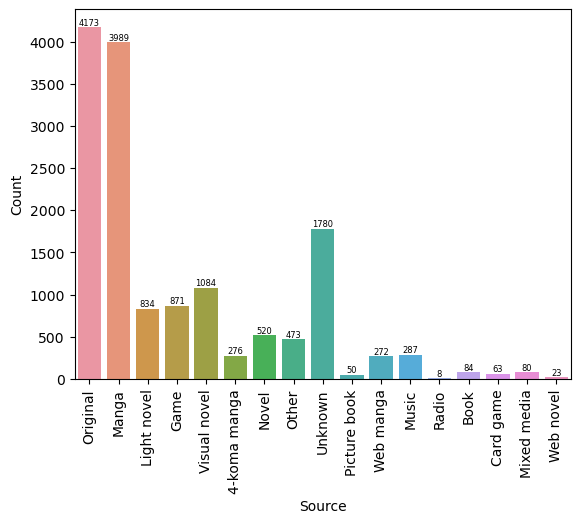

In [99]:
utils.simple_barplot(df_copy["Source"],"Source")

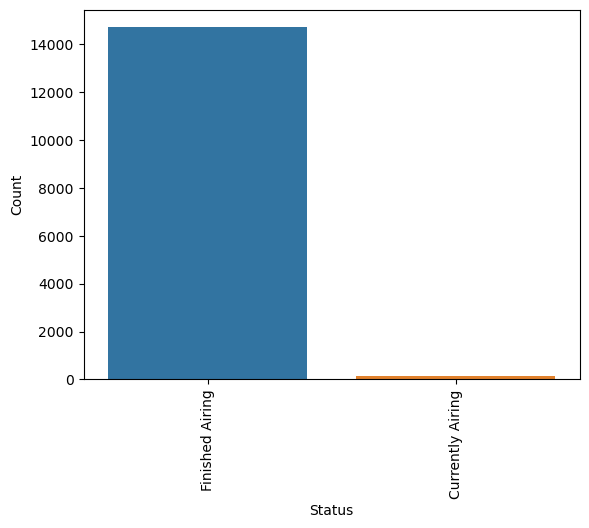

In [68]:
utils.simple_barplot(df_copy["Status"],"Status")

In [47]:
'''
Before the explode variable should be entered manually, now lets try creating it automatically depending on the data to analyze
'''
def pieplot(data, graph_name):
    # Create an axis object
    fig, ax = plt.subplots(1, 1, figsize = (15, 8))
    
    # Get the data in the right format
    piedata = Counter(data)

    height = list(piedata.keys())
    bars  = list(piedata.values())
    
    # Assign explode value automatically depending on the data and
    # declaring the exploding pie to separate one of the parts, in this case, the higher
    max_val = max(bars)
    max_index = bars.index(max_val)
    length =len(bars)
    explode_value = tuple([0 if i!=max_index else 0.2 for i in range(length)])

    # Plot the pie chart
    ax.pie(bars, labels = height, shadow = False, explode=explode_value ,startangle = 0, autopct = "%1.2f%%")

    #ax.axis('equal')
    ax.set_title(f"Pie chart for {graph_name} category.")
    
    # Save the plot to an image

    # Show graphic
    plt.show()

    # Close the plot
    plt.close()

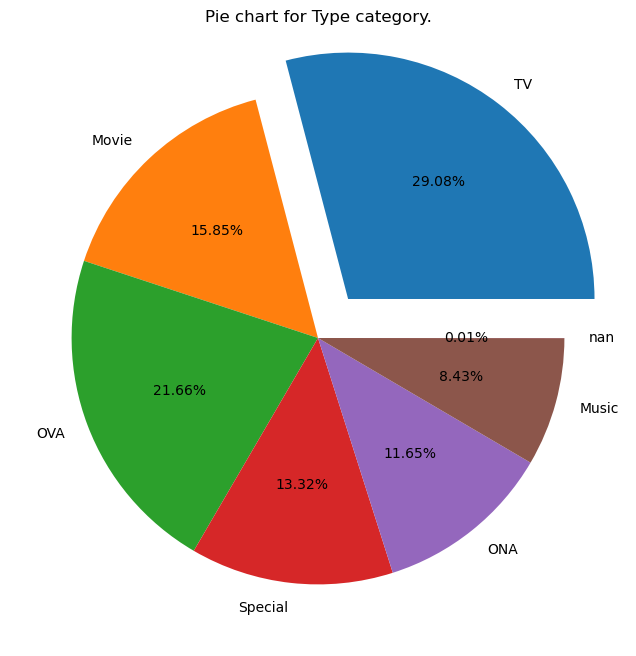

In [49]:
utils.pieplot(df_copy["Type"],"Type")

In [ ]:
print(df.value_counts(subset=['Released', 'Type']).sort_index())

In [ ]:
#Creating df with just year and producers columns
columns = ['Released', 'Type']
df_re_pro = pd.DataFrame(df_copy, columns=columns)
df_re_pro.head()

In [ ]:
# # Separating producers 
# df_re_pro_ex = df_re_pro.assign(Producers=df_re_pro['Type'].str.split(',')).explode('Type')
# df_re_pro_ex.head()

In [ ]:
df_re_pro.groupby(["Released", "Type"]).count()

In [ ]:
print(df_re_pro.value_counts(subset=['Released', 'Type']).sort_index()).reset_index(name='counts')

In [ ]:
sns.countplot(x='Released',hue='Type',data=df_re_pro)
sns.set(rc={'figure.figsize':(30,30)})
plt.title("Releases por productora por año")
plt.xticks(rotation=90)
plt.show()

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.countplot(x='Released',hue='Producers',data=df_re_pro_ex,order=pd.value_counts(df_re_pro_ex['Released']).iloc[3:].index)
sns.set(rc={'figure.figsize':(30,30)})
plt.title("3 ños donde menos releases se hicieron")

In [ ]:
#Calculate the correlation
df.corr()

In [ ]:
#Producers by year
columns = ['Released', 'Producers']
df = pd.DataFrame(anime_df, columns=columns)
df_re_pro2 = df.assign(Producers=df['Producers'].str.split(',')).explode('Producers')
df_re_pro2

In [ ]:
df_copy.fillna("",inplace=True)

In [ ]:
df_copy_2 = df_copy.copy()

In [ ]:
#Histogram of Score values without zero
new = df_copy_2['Score'].copy()
plt.hist(new[new>0], color="grey")

In [ ]:
#Histogram of Score values without zero
new = df_copy_2['Score'].copy()
import seaborn as sns
# Plot the histogram thanks to the distplot function
sns.distplot( a=new[new>0], hist=True, kde=False, rug=False )

In [ ]:
def split(df,categ):
    categ_list = []
    for item in df[categ]:
        item = item.strip().split(',')
        categ_list.extend(item)
    list_data = Counter(categ_list)
    return list_data

def barplot(df, categ):
    categ_list = []
    for item in df[categ]:
        item = item.strip().split(',')
        categ_list.extend(item)
    list_data = Counter(categ_list)

    height = list(list_data.keys()) 
    bars = list(list_data.values()) 

    x_pos = np.arange(len(height))

    # Create bars
    plt.bar(x_pos, bars)

    # Create names on the x-axis
    plt.xticks(x_pos, height, color='orange',rotation=90)
    plt.yticks(color='orange')


    # Show graphic
    plt.show()

In [ ]:
barplot(df_copy,"Audience")

## Rellenando valores nulos en Score


In [50]:
df_copy

,Type,Source,N_Episodes,Duration,Status,Rating,Score,Scored_by,Rank,Genre,Theme,Released,Studios,Producers
0,TV,Original,26,24 min per ep,Finished Airing,R - 17+ (violence & profanity),8.75,871603,38,"Action,Sci-Fi","Adult Cast,Space",1998,Sunrise,Bandai Visual
1,Movie,Original,1,1 hr 55 min,Finished Airing,R - 17+ (violence & profanity),8.38,199009,182,"Action,Sci-Fi","Adult Cast,Space",2001,Bones,"Sunrise,Bandai Visual"
2,TV,Manga,26,24 min per ep,Finished Airing,PG-13 - Teens 13 or older,8.22,338974,320,"Action,Adventure,Comedy,Drama,Sci-Fi",Adult Cast,1998,Madhouse,Victor Entertainment
3,TV,Original,26,25 min per ep,Finished Airing,PG-13 - Teens 13 or older,7.25,42103,2778,"Action,Drama,Mystery,Supernatural",Detective,2002,Sunrise,"TV Tokyo,Bandai Visual,Dentsu,Victor Entertain..."
4,TV,Manga,52,23 min per ep,Finished Airing,PG - Children,6.94,6307,4219,"Adventure,Fantasy,Supernatural",Unknown,2004,Toei Animation,"TV Tokyo,Dentsu"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25616,Special,Manga,1,1 min,Finished Airing,PG-13 - Teens 13 or older,6.20,445,8136,"Comedy,Romance,Sci-Fi,Supernatural",Unknown,2022,David Production,Unknown
25619,Music,Original,1,4 min,Finished Airing,PG-13 - Teens 13 or older,6.59,221,5969,Unknown,Music,2022,Unknown,Unknown
25620,ONA,Light novel,0,2 min,Currently Airing,PG-13 - Teens 13 or older,6.55,479,6203,"Comedy,Fantasy","Isekai,Reincarnation",2022,Studio PuYUKAI,"AT-X,BS NTV,Kadokawa,NewGin,Aiming"
25807,ONA,Other,1,3 min,Finished Airing,G - All Ages,6.20,933,8134,"Action,Adventure,Sci-Fi","Military,Space",2022,Studio Ghibli,Unknown


In [179]:
new_df_score = df_copy[['Type', 'Source',"Genre", 'Score', 'Rank']].copy()

In [164]:
new_df_score

,Type,Source,Genre,Score,Rank
0,TV,Original,"['Action', 'Sci-Fi']",8.75,38.0
1,Movie,Original,"['Action', 'Sci-Fi']",8.38,182.0
2,TV,Manga,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",8.22,320.0
3,TV,Original,"['Action', 'Drama', 'Mystery', 'Supernatural']",7.25,2778.0
4,TV,Manga,"['Adventure', 'Fantasy', 'Supernatural']",6.94,4219.0
...,...,...,...,...,...
25847,Music,Original,[],0.00,0.0
25848,Special,Original,['Comedy'],0.00,0.0
25849,TV,Original,"['Action', 'Adventure', 'Fantasy']",0.00,0.0
25850,TV,Original,"['Action', 'Adventure', 'Drama', 'Mystery', 'S...",0.00,0.0


In [123]:
Genre = df_copy['Genre'].str.split(',').explode().value_counts()

In [181]:
new_df_score['Score'].value_counts()

6.13    5752
6.02    2492
6.88     734
6.06     673
6.40     492
        ... 
3.46       1
3.16       1
3.67       1
1.85       1
8.83       1
Name: Score, Length: 565, dtype: int64

In [180]:
new_df_score['Score'].value_counts()
new_df_score['Score'] = (np.where(new_df_score['Score']==0,new_df_score['Score'].replace(0,np.nan).
                groupby(new_df_score['Source']).transform('median'),new_df_score['Score']))

In [182]:
new_df_score

,Type,Source,Genre,Score,Rank
0,TV,Original,"['Action', 'Sci-Fi']",8.75,38.0
1,Movie,Original,"['Action', 'Sci-Fi']",8.38,182.0
2,TV,Manga,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",8.22,320.0
3,TV,Original,"['Action', 'Drama', 'Mystery', 'Supernatural']",7.25,2778.0
4,TV,Manga,"['Adventure', 'Fantasy', 'Supernatural']",6.94,4219.0
...,...,...,...,...,...
25847,Music,Original,[],6.13,0.0
25848,Special,Original,['Comedy'],6.13,0.0
25849,TV,Original,"['Action', 'Adventure', 'Fantasy']",6.13,0.0
25850,TV,Original,"['Action', 'Adventure', 'Drama', 'Mystery', 'S...",6.13,0.0


In [145]:
# Lets check again the percenteage of null values
((new_df_score.isnull().sum() / len(new_df_score))*100).sort_values(ascending = False)

Score     0.607303
Type      0.464181
Source    0.000000
Genre     0.000000
Rank      0.000000
dtype: float64

In [153]:
#Print number of null per column
new_df_score.isnull().sum()

TypeError: isnull() takes 1 positional argument but 2 were given

In [146]:
new_df_score

,Type,Source,Genre,Score,Rank
0,TV,Original,"['Action', 'Sci-Fi']",8.75,38.0
1,Movie,Original,"['Action', 'Sci-Fi']",8.38,182.0
2,TV,Manga,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",8.22,320.0
3,TV,Original,"['Action', 'Drama', 'Mystery', 'Supernatural']",7.25,2778.0
4,TV,Manga,"['Adventure', 'Fantasy', 'Supernatural']",6.94,4219.0
...,...,...,...,...,...
25847,Music,Original,[],5.80,0.0
25848,Special,Original,['Comedy'],6.20,0.0
25849,TV,Original,"['Action', 'Adventure', 'Fantasy']",7.00,0.0
25850,TV,Original,"['Action', 'Adventure', 'Drama', 'Mystery', 'S...",NaN,0.0


In [116]:
fill_vals = new_df_score.Score.mask(new_df_score.Score.eq(0)).groupby(new_df_score['Type','Source','Genre']).transform(np.nanmedian)
new_df_score.assign(salary = new_df_score.Score.mask(new_df_score.Score.eq(0), fill_vals))

KeyError: ('Type', 'Source', 'Genre')

In [91]:
new_df_score["Score"] = new_df_score.groupby(['Type','Source','Genre']).transform(lambda x: x.fillna(x.mean()))

ValueError: Columns must be same length as key

In [103]:
new_df_score['Score'] = new_df_score.groupby(['Type','Source'])['Score']\
.transform(lambda x: x.replace(x.mean()))

In [108]:
new_df_score

,Type,Source,Genre,Score,Rank
0,TV,Original,"['Action', 'Sci-Fi']",8.75,38.0
1,Movie,Original,"['Action', 'Sci-Fi']",8.38,182.0
2,TV,Manga,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",8.22,320.0
3,TV,Original,"['Action', 'Drama', 'Mystery', 'Supernatural']",7.25,2778.0
4,TV,Manga,"['Adventure', 'Fantasy', 'Supernatural']",6.94,4219.0
...,...,...,...,...,...
25847,Music,Original,[],0.00,0.0
25848,Special,Original,['Comedy'],0.00,0.0
25849,TV,Original,"['Action', 'Adventure', 'Fantasy']",0.00,0.0
25850,TV,Original,"['Action', 'Adventure', 'Drama', 'Mystery', 'S...",0.00,0.0


In [89]:
new_df_score['Score'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 25852 entries, 0 to 25851
Series name: Score
Non-Null Count  Dtype  
--------------  -----  
13389 non-null  float64
dtypes: float64(1)
memory usage: 202.1 KB


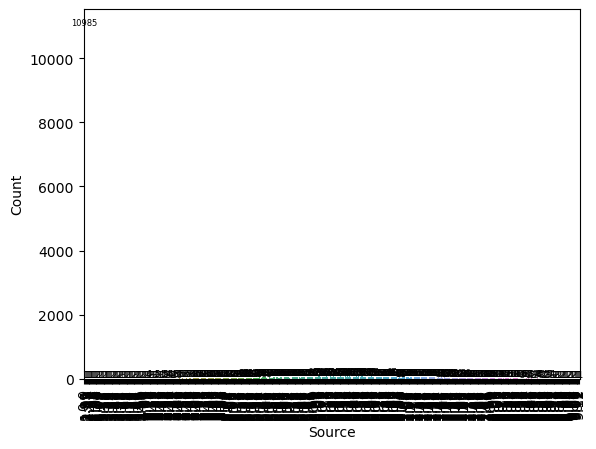

In [154]:
utils.simple_barplot(new_df_score['Score'],"Source")

In [ ]:
sd.apply(print)

In [77]:
data1 = new_df_score.groupby("Genre")

In [67]:
data1 = new_df_score.groupby('Genre')['Score'].mean().reset_index()

In [68]:
data1.columns = ['Category','Mean']

In [78]:
data1

In [71]:
data1 = new_df_score.groupby('Type', 'Source')

ValueError: No axis named Source for object type DataFrame

In [ ]:
data1 = data.groupby('Category')['Value'].mean().reset_index()
data1.columns = ['Category','Mean']
data = data.join(data1.set_index('Category'), on='Category')
data['Value'] = data['Value'].fillna(data['Mean'])
data=data.drop('Mean',axis=1)
data

In [ ]:
#The purpose of this EDA is to analyze scored animes, for this reason So will eliminate the rows that have a score as "0".
# score_eliminated = df_copy[df_copy['Score'] == 0].index
# 
# df_copy.drop(score_eliminated , inplace = True)

In [ ]:
df_prueba = df_copy[(df_copy["Type"]== "Music") & (df_copy["Rating"] == "G - All Ages")]
df_prueba

In [ ]:
df_copy

In [ ]:
df_copy_copy['Duration'] = df_copy['Duration'].str.replace(" hr", '*60').str.replace(' min','*1').str.replace(' sec','*0.01').str.replace(' ','+').str.replace('per','').str.replace('ep','').str.replace('Unknown','0').apply(eval)

In [ ]:
count = df_copy['Released'].value_counts()[0]

In [63]:
column = df_copy['Rank']
count = column[column == 0].count()
count

4346

##  pruebas no paramétricas

In [ ]:
df_season = df.dropna(subset="Season")
df_type = df.dropna(subset="Type")
df_rating = df.dropna(subset="Rating")
df_score = df.dropna(subset="Score")

In [ ]:
df_season["Season"].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [ ]:
df.Status.value_counts(normalize = True)

Finished Airing     0.950139
Not yet aired       0.032918
Currently Airing    0.016943
Name: Status, dtype: float64

In [ ]:
var_status_season = pd.crosstab(df_season["Status"],df_season["Season"]) # para ver si hay dependencia
var_status_season

Season,fall,spring,summer,winter
Status,,,,
Currently Airing,67,26,8,11
Finished Airing,1488,1698,930,1036
Not yet aired,1,22,4,51


In [ ]:
from scipy.stats import chi2_contingency #prueba no paramétrica (primer valor es el chi estadístico, lo que se espera para aceptarlo. segundo el p-value.(al ser más pequeñó de 0.05))
chi2_contingency(var_status_season)

(158.22510050716494,
 1.4070021357089775e-31,
 6,
 array([[  32.62298765,   36.60651441,   19.7499064 ,   23.02059154],
        [1500.65743167, 1683.89966305,  908.4956945 , 1058.94721078],
        [  22.71958068,   25.49382254,   13.7543991 ,   16.03219768]]))

In [ ]:
var_rate_season = pd.crosstab(df_season["Rating"],df_season["Season"]) # para ver si hay dependencia
var_rate_season

Season,fall,spring,summer,winter
Rating,,,,
G - All Ages,341,390,136,245
PG - Children,199,276,128,139
PG-13 - Teens 13 or older,734,828,485,533
R - 17+ (violence & profanity),179,138,111,98
R+ - Mild Nudity,74,75,66,46


In [ ]:
from scipy.stats import chi2_contingency #prueba no paramétrica (primer valor es el chi estadístico, lo que se espera para aceptarlo. segundo el p-value.(al ser más pequeñó de 0.05))
chi2_contingency(var_rate_season)

(58.618326175249585,
 4.026380394304237e-08,
 12,
 array([[325.22964949, 363.56713273, 197.22505267, 225.9781651 ],
        [217.01474813, 242.5960544 , 131.60160889, 150.78758858],
        [754.57958246, 843.52805976, 457.5904999 , 524.30185788],
        [153.84064355, 171.97510056,  93.29170657, 106.89254932],
        [ 76.33537636,  85.33365256,  46.29113197,  53.03983911]]))

In [ ]:
var_season = pd.crosstab(df_season["Season"],df_season["Season"])
var_season

Season,fall,spring,summer,winter
Season,,,,
fall,1556,0,0,0
spring,0,1746,0,0
summer,0,0,942,0
winter,0,0,0,1098


In [ ]:
df.Season.value_counts(normalize = True)

spring    0.326844
fall      0.291277
winter    0.205541
summer    0.176338
Name: Season, dtype: float64

In [ ]:
from scipy.stats import chi2_contingency #prueba no paramétrica (primer valor es el chi estadístico, lo que se espera para aceptarlo. segundo el p-value.(al ser más pequeñó de 0.05))
chi2_contingency(var_season)

(16026.0,
 0.0,
 9,
 array([[453.22650693, 508.56907525, 274.38262823, 319.82178959],
        [508.56907525, 570.66941221, 307.88693373, 358.87457881],
        [274.38262823, 307.88693373, 166.11081992, 193.61961812],
        [319.82178959, 358.87457881, 193.61961812, 225.68401348]]))

In [ ]:
var_score_season = pd.crosstab(df_season["Score"],df_season["Season"])
var_score_season

Season,fall,spring,summer,winter
Score,,,,
2.91,0,0,0,1
3.13,0,1,0,0
3.29,0,1,0,0
3.30,0,0,0,1
3.33,0,0,1,0
...,...,...,...,...
9.07,0,1,0,0
9.08,0,1,0,0
9.09,0,1,0,0


In [ ]:
chi2_contingency(var_score_season) #prueba no paramétrica (primer valor es el chi estadístico, lo que se espera para aceptarlo. segundo el p-value.)

(1329.7806006084943,
 0.19845239623044283,
 1287,
 array([[0.29993009, 0.32090422, 0.17711489, 0.2020508 ],
        [0.29993009, 0.32090422, 0.17711489, 0.2020508 ],
        [0.29993009, 0.32090422, 0.17711489, 0.2020508 ],
        ...,
        [0.29993009, 0.32090422, 0.17711489, 0.2020508 ],
        [0.29993009, 0.32090422, 0.17711489, 0.2020508 ],
        [0.29993009, 0.32090422, 0.17711489, 0.2020508 ]]))

In [ ]:
df_season = df.dropna(subset="Season")
for i in df.columns:
    if i != "Season":
        var_season = pd.crosstab(df_season[i],df_season["Season"])
        x,p,z,h = chi2_contingency(var_season)
        if p> 0.05:
            print(i)

Cover
English_Title
Japanses_Title
Type
Score
Scored_by
Rank


In [ ]:
 #prueba no paramétrica (primer valor es el chi estadístico, lo que se espera para aceptarlo. segundo el p-value.)
chi2_contingency(var_season)

(8084.379173542643,
 0.0031358501825626667,
 7740,
 array([[2.91276675e-01, 3.26843879e-01, 1.76338450e-01, 2.05540996e-01],
        [2.91276675e-01, 3.26843879e-01, 1.76338450e-01, 2.05540996e-01],
        [2.91276675e-01, 3.26843879e-01, 1.76338450e-01, 2.05540996e-01],
        ...,
        [1.74766005e+00, 1.96106327e+00, 1.05803070e+00, 1.23324598e+00],
        [2.91276675e-01, 3.26843879e-01, 1.76338450e-01, 2.05540996e-01],
        [3.93806065e+02, 4.41892924e+02, 2.38409584e+02, 2.77891426e+02]]))

In [ ]:
df.Cover.value_counts(normalize = True)

https://cdn.myanimelist.net/img/sp/icon/apple-touch-icon-256.png    0.054309
https://cdn.myanimelist.net/images/anime/1096/120335l.jpg           0.000116
https://cdn.myanimelist.net/images/anime/4/19644l.jpg               0.000039
https://cdn.myanimelist.net/images/anime/1398/105660l.jpg           0.000039
https://cdn.myanimelist.net/images/anime/1778/105047l.jpg           0.000039
                                                                      ...   
https://cdn.myanimelist.net/images/anime/3/54119l.jpg               0.000039
https://cdn.myanimelist.net/images/anime/1992/96603l.jpg            0.000039
https://cdn.myanimelist.net/images/anime/5/52981l.jpg               0.000039
https://cdn.myanimelist.net/images/anime/7/52985l.jpg               0.000039
https://cdn.myanimelist.net/images/anime/1740/131344l.jpg           0.000039
Name: Cover, Length: 24447, dtype: float64

In [ ]:
df.Cover.nunique() == len(df)

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

df = with_zeros

x1 = df.loc[:,['Score','Scored_by']]
y1 = df.loc[:,['Rank']]

print ("Statsmodel.Formula.Api Method")
model1 = smf.ols(formula='Rank ~ Score + Scored_by', data=df).fit()
print (model1.params)

print ("\nStatsmodel.Api Method")
model2 = sm.OLS(y1, x1)
results = model2.fit()
print (results.params)

print ("\nSci-Kit Learn Method")
model3 = LinearRegression()
model3.fit(x1, y1)
print (model3.coef_)
print (model3.intercept_)

In [ ]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     3327.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:14:57   Log-Likelihood:            -2.6229e+05
No. Observations:               25852   AIC:                         5.246e+05
Df Residuals:                   25849   BIC:                         5.246e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.549e+04    359.219     98.791      0.0

False

# References 

- [MyAnimeList.net](https://myanimelist.net/)
- [from Data to Viz](https://www.data-to-viz.com/#connectedscatter)
- [Seaborn Documentation](https://seaborn.pydata.org/)
- [Matplotlib Documentation](https://matplotlib.org/)
- [Data Visualization con pandas y seaborn](https://medium.com/ironhack/data-visualization-con-pandas-y-seaborn-1044906af34f)
- [The Python Graph Gallery](https://www.python-graph-gallery.com/)
- [Stack Overflow](https://stackoverflow.com/)
- [codificandobits](https://www.codificandobits.com/blog/analisis-exploratorio-de-datos/)
- [Towards data science](https://towardsdatascience.com/beautifying-the-messy-plots-in-python-solving-common-issues-in-seaborn-7372e6479fb)
- [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html)